# Oscars Demographics Prediction Model
### Import Libraries

In [1]:
#C://Users//Perplexeus//Desktop//AI Classes//Datasets//Oscars-demographics-DFE.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Read the CSV dataset

In [2]:
df=pd.read_csv('C://Users//Perplexeus//Desktop//AI Classes//Datasets//Oscars-demographics-DFE.csv')
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,award,biourl,birthplace_gold,date_of_birth_gold,movie,person,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold
0,670454353,False,finalized,3,2/10/15 3:45,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,Two Arabian Knights,Lewis Milestone,NaN,NaN,NaN,NaN
1,670454354,False,finalized,3,2/10/15 2:03,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,...,Best Director,http://www.nndb.com/people/626/000042500/,NaN,NaN,The Divine Lady,Frank Lloyd,NaN,NaN,NaN,NaN
2,670454355,False,finalized,3,2/10/15 2:05,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,All Quiet on the Western Front,Lewis Milestone,NaN,NaN,NaN,NaN
3,670454356,False,finalized,3,2/10/15 2:04,"Chicago, Il",1.0,23-Feb-1899,1.0,White,...,Best Director,http://www.nndb.com/people/544/000041421/,NaN,NaN,Skippy,Norman Taurog,NaN,NaN,NaN,NaN
4,670454357,False,finalized,3,2/10/15 1:48,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,...,Best Director,http://www.nndb.com/people/292/000044160/,NaN,NaN,Bad Girl,Frank Borzage,NaN,NaN,NaN,NaN


---
## Part 1 - Building up a basic predictive model
The subset of the given data to analyse.
> ['birthplace', 'date_of_birth', 'race_ethnicity', 'year_of_award', 'award']

In [3]:
cols = df[['birthplace', 'date_of_birth', 'race_ethnicity', 'year_of_award', 'award']]
cols.sample(9)

,birthplace,date_of_birth,race_ethnicity,year_of_award,award
401,"Los Angeles, Ca",4-Jun-75,White,2000,Best Supporting Actress
232,"South Orange, Nj",26-Jul-59,White,1996,Best Supporting Actor
94,"Tunbridge Wells, Kent, England",11-Dec-1883,White,1936,Best Actor
210,"Bucharest, Romania",22-Sep-1902,White,1974,Best Supporting Actor
201,"London, England",16-Apr-21,White,1965,Best Supporting Actor
248,"Toronto, Ontario, Canada",13-Dec-29,White,2012,Best Supporting Actor
353,"Detroit, Mi",12-Nov-22,White,1952,Best Supporting Actress
121,"La Jolla, Ca",5-Apr-16,White,1963,Best Actor
414,"Brooklyn, Ny",12-Nov-82,White,2013,Best Supporting Actress


### Data Cleaning
Show the first 3 rows of this subset

In [4]:
cols.head(3)

,birthplace,date_of_birth,race_ethnicity,year_of_award,award
0,"Chisinau, Moldova",30-Sep-1895,White,1927,Best Director
1,"Glasgow, Scotland",2-Feb-1886,White,1930,Best Director
2,"Chisinau, Moldova",30-Sep-1895,White,1931,Best Director


Display all the distinct values for the column `'award'` in the entire subset

In [5]:
i = 0
for award in cols['award'].unique():
    i += 1
    print(str(i)+ '. ' + award)

1. Best Director
2. Best Actor
3. Best Supporting Actor
4. Best Actress
5. Best Supporting Actress


#### - Clean Date of Birth
Write a function that will rewrite an unclean date of birth to that of a clean one

In [6]:
cols['date_of_birth']

0      30-Sep-1895
1       2-Feb-1886
2      30-Sep-1895
3      23-Feb-1899
4      23-Apr-1894
          ...     
436       7-Mar-71
437      20-Oct-56
438      26-Jul-22
439      31-Aug-28
440       5-Aug-06
Name: date_of_birth, Length: 441, dtype: object

In [7]:
ldob = []
for i in range(len(cols['date_of_birth'])):
    ldob.append(len(cols['date_of_birth'][i].split('-')[-1]))
print(ldob)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [8]:
cdob = []
for i in range(len(cols['date_of_birth'])):
    if len(cols['date_of_birth'][i].split('-')[-1]) == 2:
        cdob.append(cols['date_of_birth'][i].split('-')[0] + '-' + cols['date_of_birth'][i].split('-')[1] + '-19' + cols['date_of_birth'][i].split('-')[2])
    else:
        cdob.append(cols['date_of_birth'][i])
        
# Clean up "18-Aug-1936 [1]" to "18-Aug-1936"
cdob[54] = cdob[54].split(' ')[0]

In [9]:
print(cols['date_of_birth'][27])
print(cdob[27])

7-Sep-09
7-Sep-1909


In [10]:
cols = cols.assign(date_of_birth=cdob)

cols

,birthplace,date_of_birth,race_ethnicity,year_of_award,award
0,"Chisinau, Moldova",30-Sep-1895,White,1927,Best Director
1,"Glasgow, Scotland",2-Feb-1886,White,1930,Best Director
2,"Chisinau, Moldova",30-Sep-1895,White,1931,Best Director
3,"Chicago, Il",23-Feb-1899,White,1932,Best Director
4,"Salt Lake City, Ut",23-Apr-1894,White,1933,Best Director
...,...,...,...,...,...
436,"London, England",7-Mar-1971,White,2006,Best Supporting Actress
437,"Manchester, England",20-Oct-1956,White,2009,Best Director
438,"Chicago, Il",26-Jul-1922,White,1977,Best Supporting Actor
439,"Laurel, Ne",31-Aug-1928,White,1999,Best Supporting Actor


#### - Clean Country of Birth
Write a function that will rewrite an unclean country of birth ending with two characters (For eg.- Chicago, Il) to that of a clean one by adding USA assuming its a place in USA to complete the rows missinf country of birth

In [11]:
ccob = []
for i in range(len(cols['birthplace'])):
    if len(cols['birthplace'][i].split(' ')[-1]) == 2 and cols['birthplace'][i].split(' ')[-1] != 'Na':
        ccob.append(cols['birthplace'][i] + ', USA')
    else:
        if cols['birthplace'][i] == 'New York City' or cols['birthplace'][i] == 'East Harlem, New York City':
            ccob.append(cols['birthplace'][i] + ', USA')
        else:
            ccob.append(cols['birthplace'][i])

In [12]:
print(cols['birthplace'][378])
print(ccob[378])

Old Westbury, Ny
Old Westbury, Ny, USA


In [13]:
cols = cols.assign(birthplace=ccob)

cols

,birthplace,date_of_birth,race_ethnicity,year_of_award,award
0,"Chisinau, Moldova",30-Sep-1895,White,1927,Best Director
1,"Glasgow, Scotland",2-Feb-1886,White,1930,Best Director
2,"Chisinau, Moldova",30-Sep-1895,White,1931,Best Director
3,"Chicago, Il, USA",23-Feb-1899,White,1932,Best Director
4,"Salt Lake City, Ut, USA",23-Apr-1894,White,1933,Best Director
...,...,...,...,...,...
436,"London, England",7-Mar-1971,White,2006,Best Supporting Actress
437,"Manchester, England",20-Oct-1956,White,2009,Best Director
438,"Chicago, Il, USA",26-Jul-1922,White,1977,Best Supporting Actor
439,"Laurel, Ne, USA",31-Aug-1928,White,1999,Best Supporting Actor


In [14]:
print(cols['birthplace'][378])
print(ccob[378])

Old Westbury, Ny, USA
Old Westbury, Ny, USA


#### - Add an `award_age` column and `country` column to the dataframe

In [15]:
award_age = []
country = []

for i in range(len(cols['date_of_birth'])):
    award_age.append(int(cols['year_of_award'][i])-int(cols['date_of_birth'][i].split('-')[-1]))

for i in range(len(cols['birthplace'])):
    if cols['birthplace'][i].split(' ')[-1] != 'Na':
        country.append(cols['birthplace'][i].split(', ')[-1])
    else:
        country.append(cols['birthplace'][i])

In [16]:
cols['award_age'] = award_age
cols['country'] = country

In [17]:
cols

,birthplace,date_of_birth,race_ethnicity,year_of_award,award,award_age,country
0,"Chisinau, Moldova",30-Sep-1895,White,1927,Best Director,32,Moldova
1,"Glasgow, Scotland",2-Feb-1886,White,1930,Best Director,44,Scotland
2,"Chisinau, Moldova",30-Sep-1895,White,1931,Best Director,36,Moldova
3,"Chicago, Il, USA",23-Feb-1899,White,1932,Best Director,33,USA
4,"Salt Lake City, Ut, USA",23-Apr-1894,White,1933,Best Director,39,USA
...,...,...,...,...,...,...,...
436,"London, England",7-Mar-1971,White,2006,Best Supporting Actress,35,England
437,"Manchester, England",20-Oct-1956,White,2009,Best Director,53,England
438,"Chicago, Il, USA",26-Jul-1922,White,1977,Best Supporting Actor,55,USA
439,"Laurel, Ne, USA",31-Aug-1928,White,1999,Best Supporting Actor,71,USA


---
### Data Exploration

Use graphs to prove or disprove the following hypotheses:
- Most Oscar winners are from USA.
- Most Oscar winners are White.
- Best Directors tend to be older than the Best Actors or Actresses.

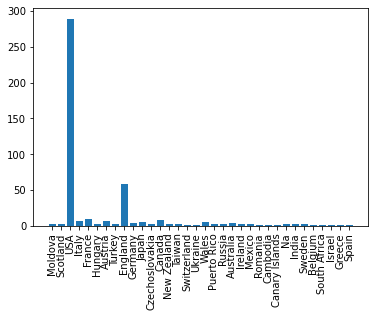

In [18]:
# Most Oscar winners are from USA?
countries = cols['country'].unique()
ccount = []
for thiscountry in countries:
    ccount.append(cols.country.value_counts()[thiscountry])
#     print(cols.country.value_counts()[thiscountry], 'oscar winners are in', thiscountry)
plt.bar(countries, ccount)
plt.xticks(rotation=90)
plt.show()


`Yes, Most Oscar winners are from USA.`

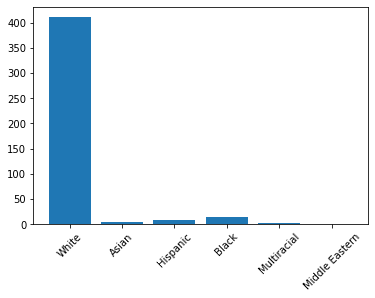

In [19]:
# Most Oscar winners are White?
race = cols['race_ethnicity'].unique()
ccount = []
for thisrace in race:
    ccount.append(cols.race_ethnicity.value_counts()[thisrace])
#     print(cols.country.value_counts()[thiscountry], 'oscar winners are in', thiscountry)
plt.bar(race, ccount)
plt.xticks(rotation=45)
plt.show()

`Yes, Most Oscar winners are White.`

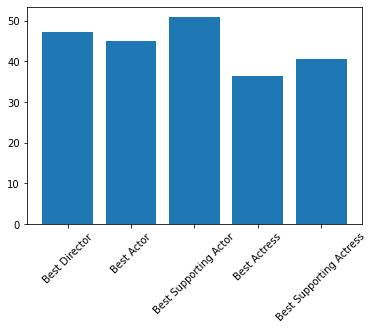

In [20]:
# Best Directors tend to be older than the Best Actors or Actresses?
award_agesum = {}
for atype in cols['award'].unique():
    award_agesum[atype] = cols.loc[cols['award'] == atype, 'award_age'].sum() / cols.award.value_counts()[atype]
    # Finding out the mean age for each award from all the data (sum of all ages given to the select award divided by total number of select award)

plt.bar(range(len(award_agesum)), list(award_agesum.values()), align='center')
plt.xticks(range(len(award_agesum)), list(award_agesum.keys()))
plt.xticks(rotation=45)
plt.show()

`Yes, on an average Best Directors tend to be older than the Best Actors or Actresses.`

---
### Model Building
Discretise the age by using buckets

- **Bucket 1:** age < 35
- **Bucket 2:** 35 <= age < 45
- **Bucket 3:** 45 <= age < 55
- **Bucket 4:** 55 <= age

For Reference Purposes:
> Middle Eastern = 143,
>
> Black = 160, 
>
> Hispanic  = 237,
>
> Asian = 86,
>
> Multiracial = 141,
>
> White = 37

In [21]:
ageB1, ageB2, ageB3, ageB4  = [], [], [], []
for age in cols['award_age']:
    if age < 35:
        ageB1.append(1)
        ageB2.append(0)
        ageB3.append(0)
        ageB4.append(0)
    elif age >= 35 and age < 45:
        ageB1.append(0)
        ageB2.append(1)
        ageB3.append(0)
        ageB4.append(0)
    elif age >= 45 and age < 55:
        ageB1.append(0)
        ageB2.append(0)
        ageB3.append(1)
        ageB4.append(0)
    elif age >= 55:
        ageB1.append(0)
        ageB2.append(0)
        ageB3.append(0)
        ageB4.append(1)
        
# Set Encoder
enc = OneHotEncoder(handle_unknown='ignore')
le = LabelEncoder()

# Encode
race = tuple(cols['race_ethnicity'].unique())
enc_race = pd.DataFrame(enc.fit_transform(cols[['race_ethnicity']]).toarray()) # one-hot encode
enc_race.rename(columns = {0:race[1], 1:race[3], 2:race[2], 3:race[5], 4:race[4], 5:race[0]}, inplace = True)
cols['country'] = le.fit_transform(cols['country']) # label encode
cols['award'] = le.fit_transform(cols['award']) # label encode

In [22]:
# Finish up the final modelDB
df = enc_race
df = df.join(cols['country'])
df['<35'] = ageB1
df['35-44'] = ageB2
df['45-54'] = ageB3
df['>55'] = ageB4
df = df.join(cols['award'])
df

,Asian,Black,Hispanic,Middle Eastern,Multiracial,White,country,<35,35-44,45-54,>55,award
0,0.0,0.0,0.0,0.0,0.0,1.0,18,1,0,0,0,2
1,0.0,0.0,0.0,0.0,0.0,1.0,24,0,1,0,0,2
2,0.0,0.0,0.0,0.0,0.0,1.0,18,0,1,0,0,2
3,0.0,0.0,0.0,0.0,0.0,1.0,31,1,0,0,0,2
4,0.0,0.0,0.0,0.0,0.0,1.0,31,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
436,0.0,0.0,0.0,0.0,0.0,1.0,7,0,1,0,0,4
437,0.0,0.0,0.0,0.0,0.0,1.0,7,0,0,1,0,2
438,0.0,0.0,0.0,0.0,0.0,1.0,31,0,0,0,1,3
439,0.0,0.0,0.0,0.0,0.0,1.0,31,0,0,0,1,3


#### Split the data
Split the data into training & test sets

In [23]:
X = df[['Asian', 'Black', 'Hispanic', 'Middle Eastern', 'Multiracial', 'White', 'country', '<35', '35-44', '45-54', '>55',]]
Y = df['award']

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3, random_state=42)



print("X [Train" + str(X_train.shape) + " + Test" + str(X_test.shape) + " = Total" + str(X.shape) + "]")
print("Y [Train" + str(Y_train.shape) + " + Test" + str(Y_test.shape) + " = Total" + str(Y.shape) + "]")

X [Train(308, 11) + Test(133, 11) = Total(441, 11)]
Y [Train(308,) + Test(133,) = Total(441,)]


### Linear Regression Model
#### Initiate Linear Regression Model & Fit x, y

In [24]:
lr_model = LinearRegression()
lr_model.fit(X_train,Y_train)

LinearRegression()

#### Get results for Linear Regression Model

In [25]:
print("Cofficient of Determation:", lr_model.score(X_train,Y_train))
print("Intercet:", lr_model.intercept_)
print("Slope:", lr_model.coef_)

Cofficient of Determation: 0.0809755436118943
Intercet: 1.5076899922363367
Slope: [ 1.088134    0.79208225  1.36806482 -2.14128666 -1.0626048  -0.0443896
  0.01891706  0.08621814 -0.30450928  0.0471679   0.17112324]


#### Predict using Linear Regression Model

In [26]:
lr_Y_pred = lr_model.predict(X_test)
for i in range(len(Y_test)):
    print(lr_Y_pred[i], Y_test.to_numpy()[i])

2.2208524050793184 2
2.2208524050793184 3
1.7452198797602276 0
1.7452198797602276 1
2.1359472983409202 4
2.0968970622624674 4
3.359231146540464 3
1.6428876907979693 0
1.1587911082852504 4
1.700854984020776 4
2.2208524050793184 4
1.5371322511723324 2
1.7452198797602276 0
1.2912105082957293 0
1.6533406907486952 2
2.1359472983409202 3
1.2912105082957293 2
1.8698923765302184 3
2.0968970622624674 2
1.7452198797602276 0
1.7452198797602276 2
1.7452198797602276 4
1.6428876907979693 2
1.7942241479528018 1
1.2912105082957293 4
1.5104682907874905 0
2.1359472983409202 4
1.7452198797602276 3
2.0968970622624674 0
2.1359472983409202 1
2.0968970622624674 4
1.2912105082957293 2
2.1359472983409202 0
2.1359472983409202 1
1.7452198797602276 2
1.7452198797602276 2
1.7452198797602276 0
1.8521914411756089 1
2.1359472983409202 0
1.7563900336640939 4
2.0968970622624674 2
2.1359472983409202 0
2.0968970622624674 0
2.0968970622624674 3
2.9333689110755685 0
1.7857600907591737 2
1.6533406907486952 2
2.1359472983409

### Gaussian Model
#### Initiate Gaussian Model & Fit x, y

In [27]:
classifier = GaussianNB()

classifier.fit(X_train, Y_train)

GaussianNB()

#### Predict using Gaussian Model

In [28]:
gu_Y_pred = classifier.predict(X_test)

#### Predict using Gaussian Model

In [30]:
print(classification_report(Y_test, gu_Y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.46      0.52      0.49        23
           2       0.37      0.95      0.53        40
           3       0.00      0.00      0.00        22
           4       0.33      0.04      0.07        24

    accuracy                           0.38       133
   macro avg       0.23      0.30      0.22       133
weighted avg       0.25      0.38      0.26       133



### Conclusion
The results are not very good, so either more data is required or the data is to be optimized in a much better way (data formatting and such) or a different approach/model/technique is to be used or all of the above to improve the predective ability of our model.

---
# <center>Q.E.D.</center>